**Odds Ration** = p/(1-p)

logit function = log - odds
logit(P) = log p/(1-p)

sigmoid function is the inverse form of the logit function, which is used to predict the probability

In [1]:
# plot the sigmoid function for some values

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
z

array([-7.00000000e+00, -6.90000000e+00, -6.80000000e+00, -6.70000000e+00,
       -6.60000000e+00, -6.50000000e+00, -6.40000000e+00, -6.30000000e+00,
       -6.20000000e+00, -6.10000000e+00, -6.00000000e+00, -5.90000000e+00,
       -5.80000000e+00, -5.70000000e+00, -5.60000000e+00, -5.50000000e+00,
       -5.40000000e+00, -5.30000000e+00, -5.20000000e+00, -5.10000000e+00,
       -5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -

In [2]:
phi_z = sigmoid(z)
phi_z

array([9.11051194e-04, 1.00677082e-03, 1.11253603e-03, 1.22939862e-03,
       1.35851995e-03, 1.50118226e-03, 1.65880108e-03, 1.83293894e-03,
       2.02532039e-03, 2.23784852e-03, 2.47262316e-03, 2.73196076e-03,
       3.01841632e-03, 3.33480731e-03, 3.68423990e-03, 4.07013772e-03,
       4.49627316e-03, 4.96680165e-03, 5.48629890e-03, 6.05980149e-03,
       6.69285092e-03, 7.39154134e-03, 8.16257115e-03, 9.01329865e-03,
       9.95180187e-03, 1.09869426e-02, 1.21284350e-02, 1.33869178e-02,
       1.47740317e-02, 1.63024994e-02, 1.79862100e-02, 1.98403057e-02,
       2.18812709e-02, 2.41270214e-02, 2.65969936e-02, 2.93122308e-02,
       3.22954647e-02, 3.55711893e-02, 3.91657228e-02, 4.31072549e-02,
       4.74258732e-02, 5.21535631e-02, 5.73241759e-02, 6.29733561e-02,
       6.91384203e-02, 7.58581800e-02, 8.31726965e-02, 9.11229610e-02,
       9.97504891e-02, 1.09096821e-01, 1.19202922e-01, 1.30108474e-01,
       1.41851065e-01, 1.54465265e-01, 1.67981615e-01, 1.82425524e-01,
      

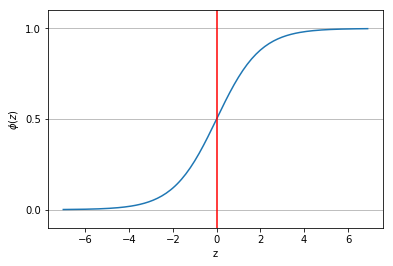

In [3]:
plt.plot(z, phi_z)
plt.axvline(x=0, color = 'r')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0, 0.5, 1]) #set tick locations and labels on y axis
ax = plt.gca()
ax.yaxis.grid(True)

plt.show()


Logistic cost function is the sum-squared-error cost function. Use likelihood, log-likehood to maximize it.

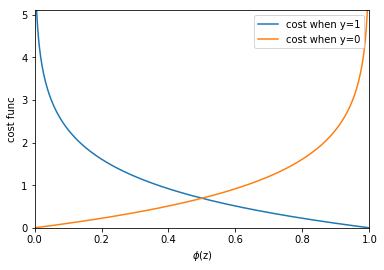

In [4]:
# the cost of classifying a single-sample instance for different values of probabilites (phi_z)
def cost_1(z):
    return -np.log(sigmoid(z)) #when y =1, the cost function = -log(phi_z)
def cost_0(z):
    return -np.log(1-sigmoid(z)) #when y=0, the cost func = -log(1-phi_z)

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'cost when y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, label = 'cost when y=0')

plt.ylim(0, 5.1)
plt.xlim(0, 1)
plt.xlabel('$\phi$(z)')
plt.ylabel('cost func')
plt.legend(loc = 'best')
plt.show()

In [5]:
# write logistic regression from scratch
# convert adline to logistic regression

class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent
    
    Parameters
    -------------
    eta : learning rate
    n_iter : epochs
    randome_state : seed
    
    Attributes
    ------------
    w_ : weights after fitting
    cost_ : logistic cost function value in each epoch
    
    """
    def __init__(self, eta=0.5, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit the traing data
        
        Parameters
        ----------
        X : training vectors
        y : target
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta* X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #logistic cost
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        return 1/(1+ np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0.5, 1, 0)

In [1]:
# borrow X_train, y_train from the last notebook
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1, stratify = y)

In [7]:
X_train

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3],
       [3.3, 1. ],
       [3.9, 1.4],
       [1.3, 0.2],
       [4.7, 1.2],
       [4. , 1.3],
       [5.1, 1.9],
       [1.9, 0.2],
       [3.5, 1. ],
       [3.9, 1.2],
       [1.6, 0.2],
       [4.8, 1.8],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.5, 1.3],
       [3.8, 1.1],
       [5.6, 2.4],
       [4.7, 1.4],
       [5.6, 1.4],
       [5.8, 2.2],
       [5.1, 2.4],
       [4.1, 1.3],
       [1.5, 0.4],
       [6.7, 2.2],
       [5. , 1.9],
       [4.8, 1.8],
       [5.6, 2.1],
       [4.2, 1.5],
       [6.7, 2. ],
       [5.5, 1.8],
       [1.6, 0.2],
       [4.9, 1.8],
       [1.4, 0.2],
       [5.1, 1.5],
       [1.9, 0.4],
       [1. , 0.2],
       [4.9, 1.5],
       [1.5, 0.2],
       [1.1, 0.1],
       [5.5, 1.8],
       [4.7, 1.5],
       [1.7, 0.3],
       [3.5, 1. ],
       [4.1,

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, test_idx = None, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c = '', edgecolor = 'black', alpha = 1.0,
                    linewidth=1, marker ='o', s=100, label = 'test set')

In [10]:
X_train_01_subset = X_train[(y_train == 0)|(y_train == 1)]
y_train_01_subset = y_train[(y_train == 0)|(y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

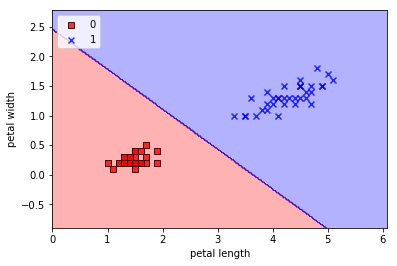

In [11]:
plot_decision_region(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

OMG, finally to use scikit-learn for logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=1)
lr.fit(X_train_std, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

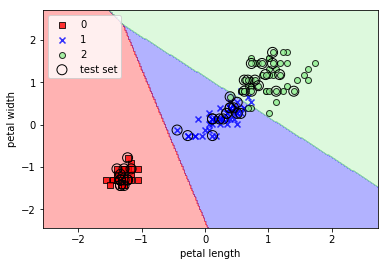

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

What is c? And what is regularization?

In [14]:
X_test_std[:3, :]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

In [15]:
lr.predict_proba(X_test_std[:3, :]) #every row sums up to 1

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [16]:
lr.predict_proba(X_test_std[:3, :]).sum(axis = 1)

array([1., 1., 1.])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [18]:
#the above is the samething as
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

scikit-learn expects a two-dimentional arrays as data input, so you have to use numpy's **reshape** function to convert your input.

In [19]:
X_test_std[0, :]

array([0.89820289, 1.44587881])

In [20]:
X_test_std[0, :].reshape(1, -1) # -1 in reshape is just a placeholder

array([[0.89820289, 1.44587881]])

In [22]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

Overfitting and Regularization

Regularization is used to model the complexity of a model. The regularization parameter in the model introduced penalty for extreme weights.

Cost function for logistic regression can be regularized by shrinking the weights in the model. (lamda increase, regularization strenth increase, more penalty)

The parameter c is the inverse of lamda. So decreasing the value of c will increase the regularization strength.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


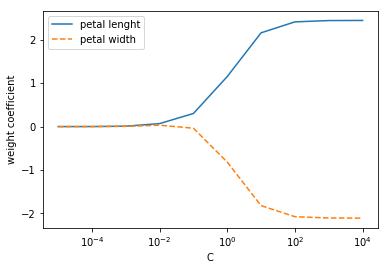

In [24]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) #only for class 1, versicolor
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'petal lenght')
plt.plot(params, weights[:,1], linestyle = '--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

so 10 logistic regression models are fit and compared only for class 1(versicolor). small c means large lamda, greater regularization, more shrinkage of weights, smaller coefficients.